# **Module 2: Vector Data in Python**

### **Exercices**
#### Data
- `gw_provinces_extra.shp` - Minnesota Groundwater Provinces shapefile;
- `mn_rivers.shp` - Minnesota river shapefile;
- `soil_samp.shp` - Soil temperature stations shapefile.

In [2]:
# general use packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# geospatial packages
from shapely.geometry import Point, LineString, Polygon
import geopandas as gpd

import os
os.environ['PROJ_LIB'] = '/opt/conda/envs/user_default/share/proj'

**Question 1. Find and plot all groundwater provinces in Minnesota that have `var1` equal to `"a"` and `var3` greater than 100.**

In [3]:
gw_provinces_extra_gdf = gpd.read_file("./data-module-2/gw_provinces_extra.shp")
subset = gw_provinces_extra_gdf[(gw_provinces_extra_gdf.var1 == "a")&(gw_provinces_extra_gdf.var3 > 100)]

<Axes: >

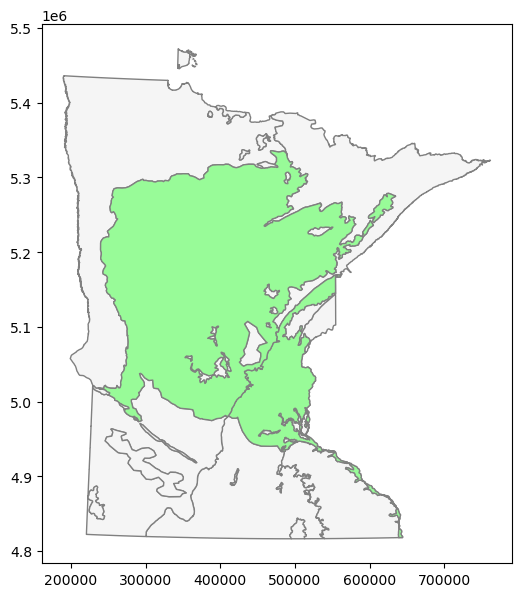

In [4]:
fig, ax = plt.subplots(figsize=(14,7))
gw_provinces_extra_gdf.plot(ax=ax, color="whitesmoke", edgecolor="grey")
subset.plot(ax=ax, color="palegreen", edgecolor="grey")

**Question 2. Create a simple `DataFrame` with the following code:**
```r
random.seed(0) 
data = {"ProvID": list(range(1,7)),
        "var4":["yes", "no", "no", "yes", "np", "yes"],
        "var5": random.sample(range(10, 50), 6)}
gw_prov_df = pd.DataFrame(data)
```
**Merge `gw_provinces_extra_gdf` with `gw_prov_df` into a new object called `gw_prov_stats`. Which columns were used as keys for join? Pay attention to the data type of these columns.**

In [5]:
random.seed(0) 
data = {"ProvID": list(range(1,7)),
        "var4": ["yes", "no", "no", "yes", "np", "yes"],
        "var5": random.sample(range(10, 50), 6)}
gw_prov_df = pd.DataFrame(data)
gw_prov_df

,ProvID,var4,var5
0,1,yes,34
1,2,no,36
2,3,no,12
3,4,yes,26
4,5,np,42
5,6,yes,41


In [6]:
gw_provinces_extra_gdf.head()

,PROVINCE,Shape_Leng,Shape_Area,var1,var2,var3,geometry
0,1,1.960325e+06,1.292675e+10,a,g,251.358443,"POLYGON ((561759.821 5169560.103, 561540.953 5..."
1,2,1.215290e+06,1.974823e+10,b,d,86.551224,"POLYGON ((416918.891 4977715.284, 417071.297 4..."
2,3,7.008053e+04,7.707483e+07,b,g,214.592184,"POLYGON ((478174.046 4959160.337, 477886.896 4..."
3,3,6.044617e+04,5.741194e+07,b,g,214.592184,"POLYGON ((421697.056 4899078.248, 421931.822 4..."
4,3,4.273664e+04,3.197101e+07,b,g,214.592184,"POLYGON ((482090.578 4884929.784, 482210.578 4..."


In [7]:
print ("dtype from df is ", gw_provinces_extra_gdf["PROVINCE"].dtype)
print ("dtype from gdf is ", gw_prov_df["ProvID"].dtype)

dtype from df is  object
dtype from gdf is  int64


In [8]:
gw_provinces_extra_gdf["PROVINCE"] = gw_provinces_extra_gdf["PROVINCE"].astype(int)
gw_prov_stats = gw_provinces_extra_gdf.merge(gw_prov_df, left_on="PROVINCE", right_on="ProvID")
gw_prov_stats.head()

,PROVINCE,Shape_Leng,Shape_Area,var1,var2,var3,geometry,ProvID,var4,var5
0,1,1.960325e+06,1.292675e+10,a,g,251.358443,"POLYGON ((561759.821 5169560.103, 561540.953 5...",1,yes,34
1,2,1.215290e+06,1.974823e+10,b,d,86.551224,"POLYGON ((416918.891 4977715.284, 417071.297 4...",2,no,36
2,3,7.008053e+04,7.707483e+07,b,g,214.592184,"POLYGON ((478174.046 4959160.337, 477886.896 4...",3,no,12
3,3,6.044617e+04,5.741194e+07,b,g,214.592184,"POLYGON ((421697.056 4899078.248, 421931.822 4...",3,no,12
4,3,4.273664e+04,3.197101e+07,b,g,214.592184,"POLYGON ((482090.578 4884929.784, 482210.578 4...",3,no,12


**Question 3. Dissolve groundwater provinces data by `var1`. Use `sum` as aggregation function.**

In [10]:
gw_provinces_extra_gdf_agg = gw_provinces_extra_gdf[["var1", "var3", "geometry"]].dissolve(by="var1", aggfunc="sum")
gw_provinces_extra_gdf_agg

,geometry,var3
var1,,
a,"MULTIPOLYGON (((561540.953 5169291.074, 561511...",958.239289
b,"MULTIPOLYGON (((417529.766 4977716.784, 417680...",3276.156612
c,"MULTIPOLYGON (((234120.000 4874790.000, 233940...",5779.036038


**Question 4. Find and plot the rivers found (even partially) in groundwater PROVINCE 5.**

In [11]:
mn_rivers_gdf = gpd.read_file("./data-module-2/mn_rivers.shp")
province5 = gw_provinces_extra_gdf[(gw_provinces_extra_gdf.PROVINCE == 5)]
rivers5 = gpd.sjoin(mn_rivers_gdf, province5, predicate="intersects")

Text(0.5, 1.0, 'Rivers in Minnesota, PROVINCE 5')

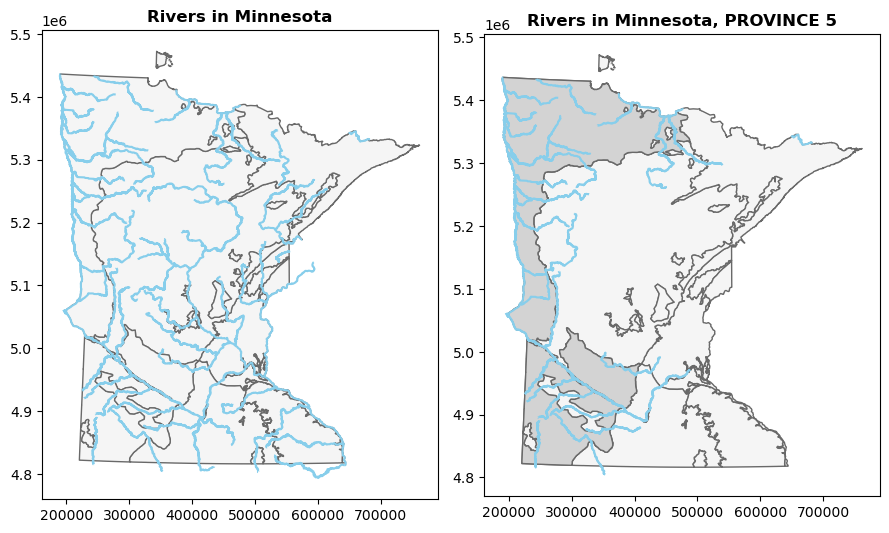

In [13]:
fig, axs = plt.subplots(1,2, figsize=(9,9), tight_layout=True)

gw_provinces_extra_gdf.plot(ax=axs[0], edgecolor="dimgrey", facecolor="whitesmoke")
mn_rivers_gdf.plot(ax=axs[0], edgecolor="skyblue")
axs[0].set_title("Rivers in Minnesota", weight="bold")

gw_provinces_extra_gdf.plot(ax=axs[1], edgecolor="dimgrey", facecolor="whitesmoke")
province5.plot(ax=axs[1], edgecolor="dimgrey", facecolor="lightgrey")
rivers5.plot(ax=axs[1], edgecolor="skyblue")
axs[1].set_title("Rivers in Minnesota, PROVINCE 5", weight="bold")

**Question 5. Which groundwater province is the Lamberton soil sample site located in?**

In [14]:
mda_gdf = gpd.read_file("./data-module-2/soil_samp.shp")
lamberton = mda_gdf[(mda_gdf.name == "Lamberton")]
lamberton_in_prov = gpd.sjoin(lamberton, gw_provinces_extra_gdf, predicate="within")
lamberton_in_prov

,source,name,t_20211,geometry,index_right,PROVINCE,Shape_Leng,Shape_Area,var1,var2,var3
6,MDA,Lamberton,50.245984,POINT (320736.564 4900834.436),35,6,415629.087218,2.581506e+09,c,e,240.793168


**Question 6. Find the soil sample sites that are within 10 km of the Mississippi river.**

In [15]:
mississippi = mn_rivers_gdf[(mn_rivers_gdf.KITTLE_NAM == "Mississippi River")]

mississippi_buffer = mississippi.copy()
mississippi_buffer["geometry"] = mississippi.buffer(10000)
mda_gdf_within_miss = gpd.sjoin(mda_gdf, mississippi_buffer, predicate="within")
mda_gdf_within_miss

,source,name,t_20211,geometry,index_right,FW_ID,KITTLE_NBR,KITTLE_NAM,LENGTH_MI,Shape_Leng
52,NDAWN,U of M at Becker,43.332420,POINT (433409.459 5021550.301),2,103383.0,M,Mississippi River,664.775237,1.069854e+06
53,NDAWN,Rice,42.902563,POINT (401933.867 5071915.131),2,103383.0,M,Mississippi River,664.775237,1.069854e+06
54,NDAWN,Little Falls,48.840284,POINT (402983.035 5087268.025),2,103383.0,M,Mississippi River,664.775237,1.069854e+06
63,UMN,St. Paul Campus,53.012919,POINT (485810.779 4981855.285),2,103383.0,M,Mississippi River,664.775237,1.069854e+06
64,NDAWN,Hastings,62.641173,POINT (511106.671 4948271.112),2,103383.0,M,Mississippi River,664.775237,1.069854e+06


**Question 7. Find 10-km buffer for Mississippi river, the centroid for Mississippi river, and Mississippi river segments that overlap PROVINCE 4 (use `overlay` operation). Display results on a figure with 3 subplots.**

In [20]:
mississippi_centroid = mississippi.copy()
mississippi_centroid["geometry"] = mississippi.centroid

In [21]:
province4 = gw_provinces_extra_gdf[(gw_provinces_extra_gdf.PROVINCE == 4)]
mississippi_segments = gpd.overlay(mississippi, province4)

Text(0.5, 1.0, 'Mississippi in PROVINCE 4')

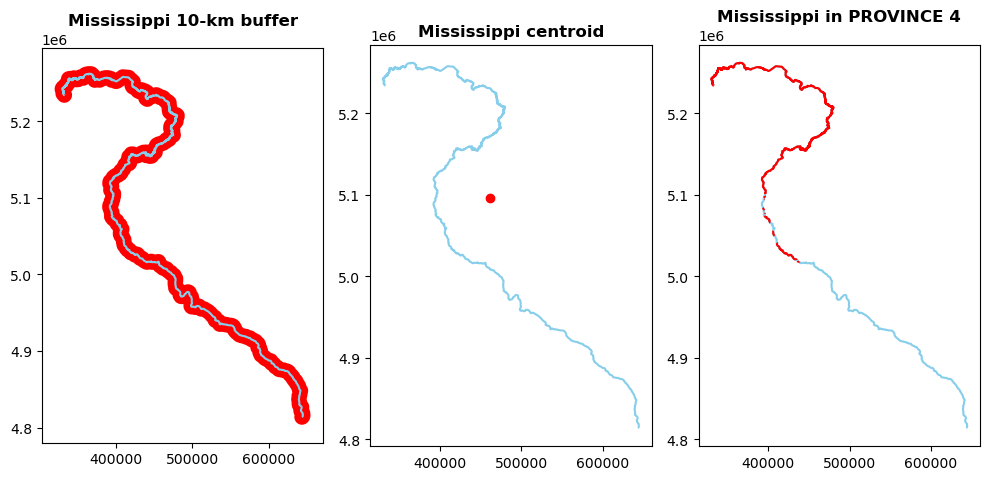

In [27]:
fig, axs = plt.subplots(1,3, figsize=(10,5), tight_layout=True)

mississippi.plot(ax=axs[0], edgecolor="skyblue")
mississippi_buffer.plot(ax=axs[0], color="red")
axs[0].set_title("Mississippi 10-km buffer", weight="bold")

mississippi.plot(ax=axs[1], edgecolor="skyblue")
mississippi_centroid.plot(ax=axs[1], color="red")
axs[1].set_title("Mississippi centroid", weight="bold")

mississippi.plot(ax=axs[2], edgecolor="skyblue")
mississippi_segments.plot(ax=axs[2], color="red")
axs[2].set_title("Mississippi in PROVINCE 4", weight="bold")